#### Names : Minhal Naqvi .. l1f23bsds0007
#### Name: Muhammad Yahya .. l1f23bsds0019
#### Name: Zeshan Zahid .. l1f23bsds0023

In [4]:
import pandas as pd
import numpy as np 
import  matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score,precision_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Question No: 1

In [5]:
df= pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,NaN,NaN,NaN,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished


### Converting Categorical Variable into numrical 

In [6]:
le=LabelEncoder()
for col in ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']:
    df[col]=le.fit_transform(df[col])


## Data Cleaning

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# Making Features
X=df.drop('price',axis=1)
y=df['price']

### visualization

Text(0.5, 1.0, 'Bedrooms vs Price')

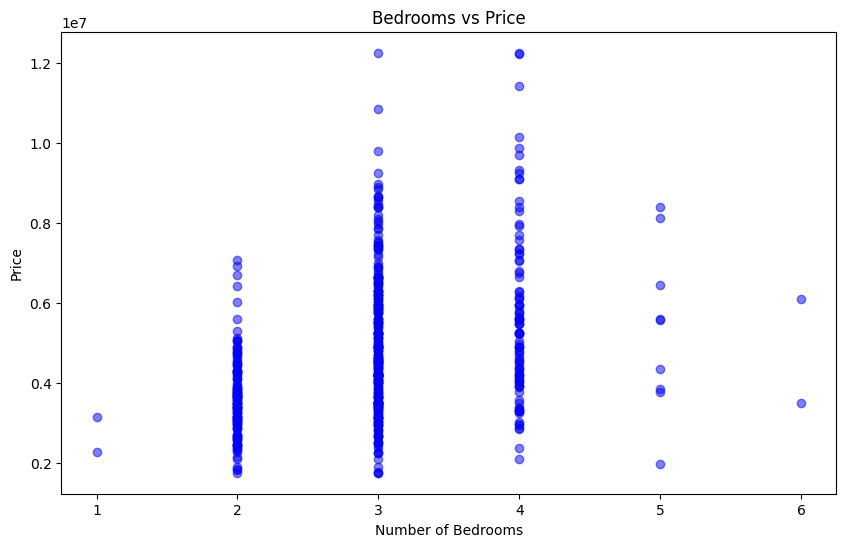

In [9]:
# Scatter plot b/w Number of rooms vs Price
plt.figure(figsize=(10,6))
plt.scatter(df["bedrooms"],df["price"],color='blue',alpha=0.5)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Price")




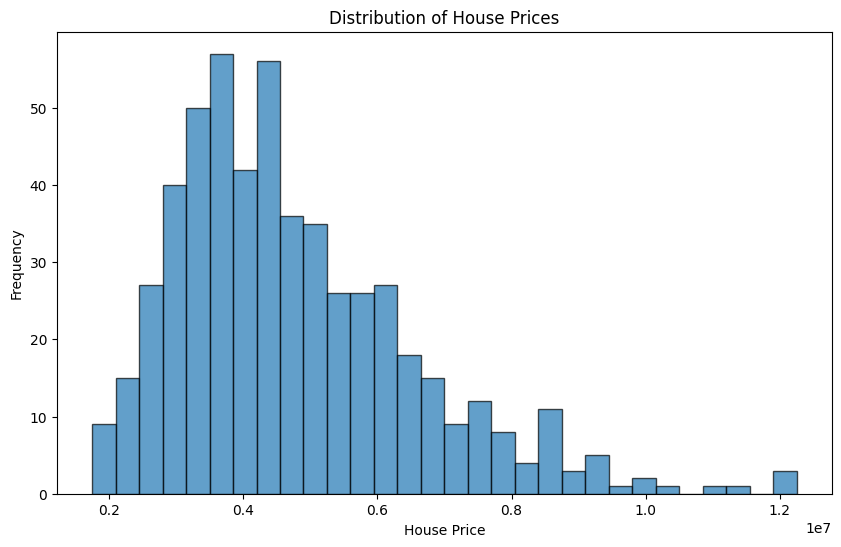

In [10]:
# Histrogrm to check how house prices are spread across the dataset.
plt.figure(figsize=(10,6))
plt.hist(df['price'],bins=30,edgecolor='black',alpha=0.7)
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

Text(0.5, 1.0, 'Area vs Price')

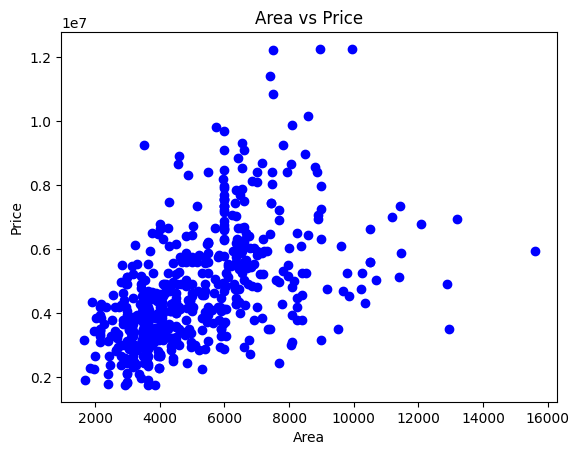

In [11]:
plt.scatter(df['area'],df['price'],color="blue")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")

Text(0.5, 1.0, 'stories vs Price')

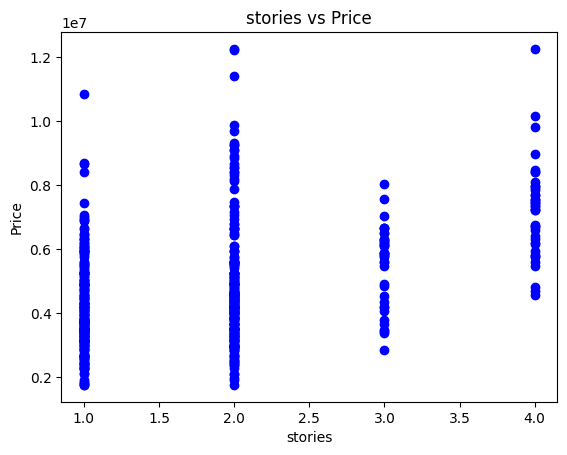

In [12]:
plt.scatter(df['stories'],df['price'],color="blue")
plt.xlabel("stories")
plt.ylabel("Price")
plt.title("stories vs Price")

Text(0.5, 1.0, 'bathrooms vs Price')

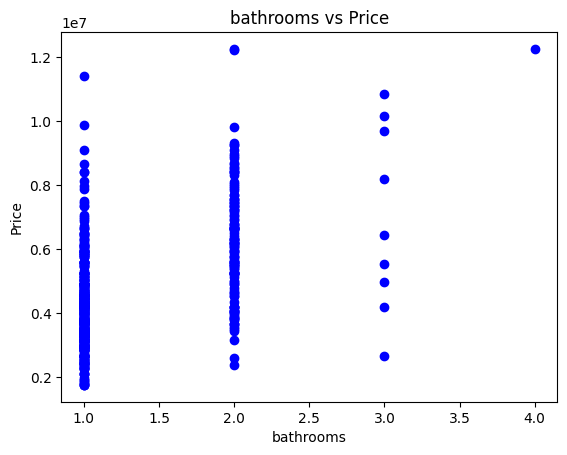

In [13]:
plt.scatter(df['bathrooms'],df['price'],color="blue")
plt.xlabel("bathrooms")
plt.ylabel("Price")
plt.title("bathrooms vs Price")

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(432, 12) (108, 12) (432,) (108,)


In [15]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [16]:
y_pred=model.predict(X_test)
print("R2 score:",r2_score(y_test,y_pred))

R2 score: 0.6697374997432733


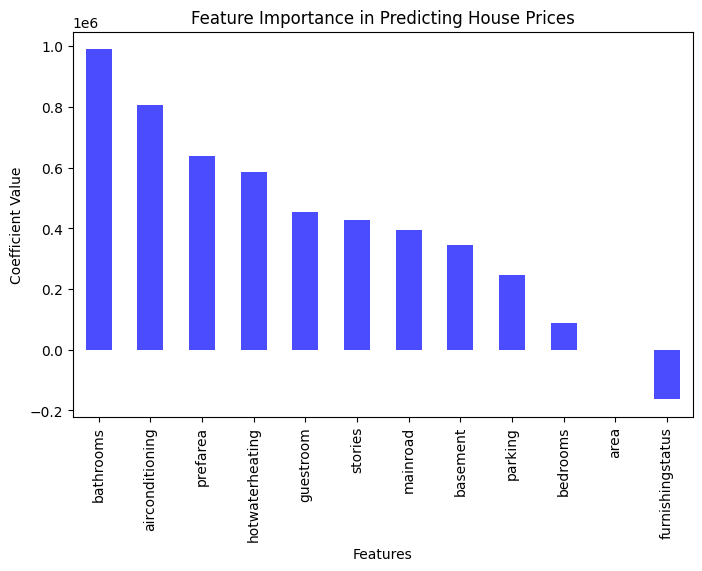

In [17]:
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
coefficients.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Predicting House Prices")
plt.show()

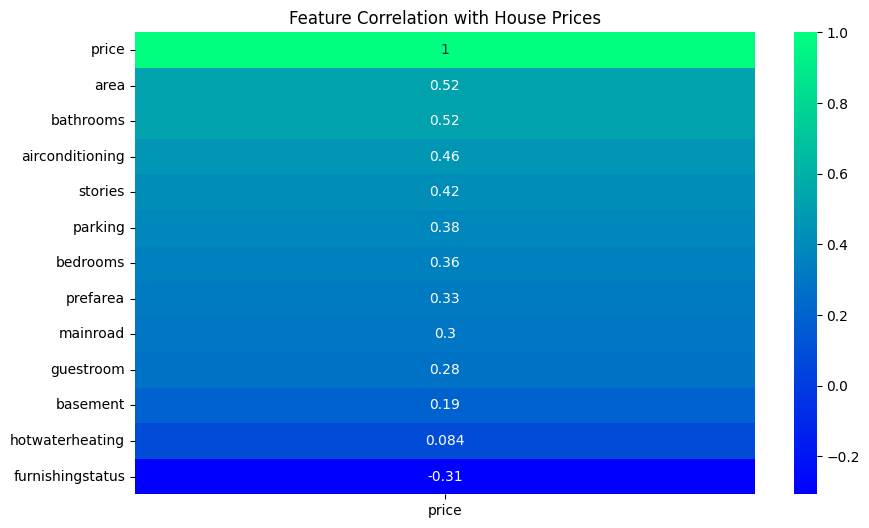

In [18]:
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='winter')
plt.title("Feature Correlation with House Prices")
plt.show()

# Question No: 2

In [19]:
df1=pd.read_csv("customer_churn_dataset-testing-master.csv")
df1.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [20]:
df1.shape

(64374, 12)

In [21]:
# Dropping customerid beacuse it has no use in prediction 
df1.drop("CustomerID",axis=1,inplace=True)

In [22]:
# Label encoding Subscription and contract Length
encoder=LabelEncoder()
for col in ["Gender","Subscription Type","Contract Length"]:
    df1[col]=encoder.fit_transform(df1[col])
# Checking if work is done 
df1.head(3)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,0,757,21,0


### Data Cleaning

In [23]:
df1.isnull().sum()
# AS there are no missing values in this data set so we will not perform any kind of data cleaning method..

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

### Visualizations

(array([6775., 6756., 6605., 6849., 6272., 6099., 6258., 6208., 6334.,
        6218.]),
 array([ 100.,  190.,  280.,  370.,  460.,  550.,  640.,  730.,  820.,
         910., 1000.]),
 <BarContainer object of 10 artists>)

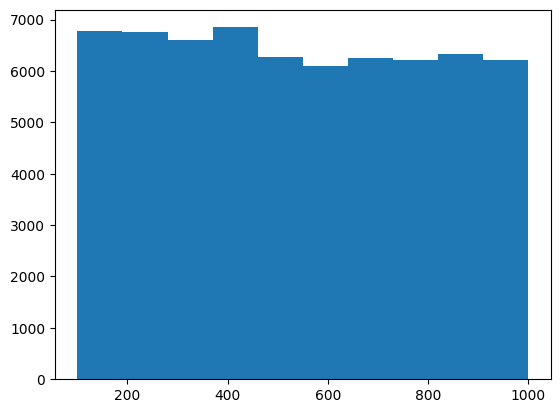

In [24]:
plt.hist(df1['Total Spend'])

<AxesSubplot: xlabel='Churn', ylabel='Age'>

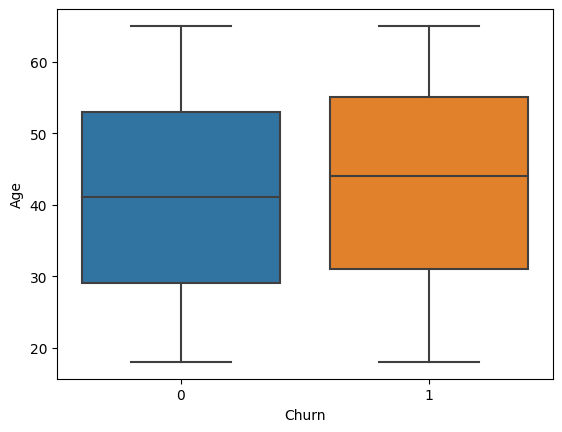

In [25]:
sns.boxplot(x=df1['Churn'], y=df1['Age'])

<AxesSubplot: xlabel='Churn', ylabel='Tenure'>

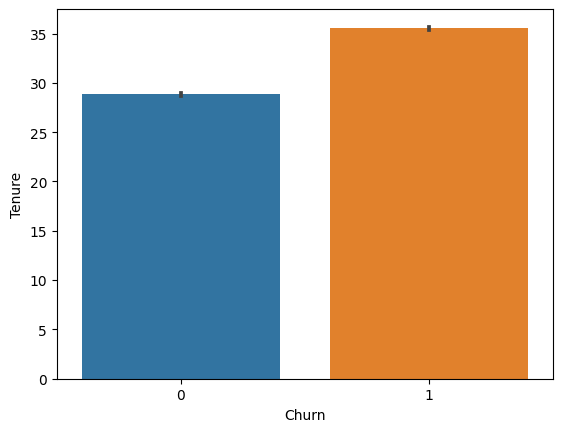

In [26]:
sns.barplot(x=df1['Churn'], y=df1['Tenure'])

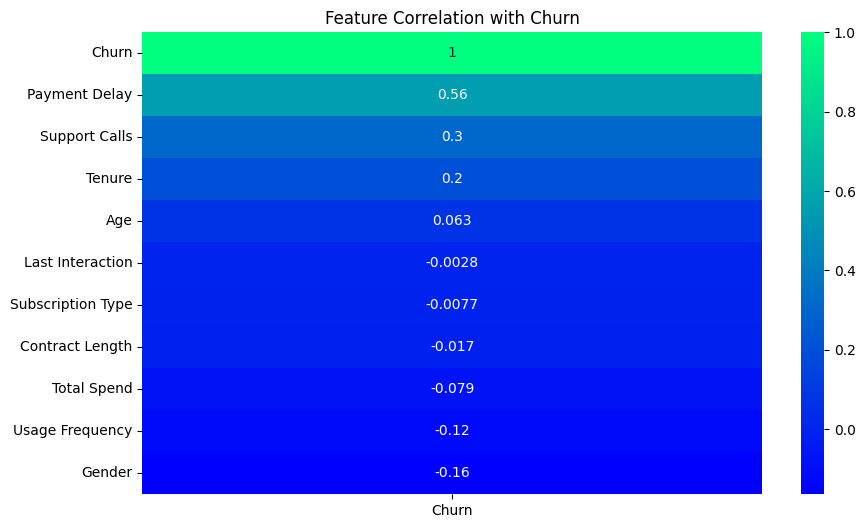

In [27]:
corr_matrix = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='winter')
plt.title("Feature Correlation with Churn")
plt.show()

So Payment Delay is most import feature in finding Churn 

Traning and Testing spliting

In [28]:
X1=df1.drop("Churn",axis=1)
y1=df1['Churn']

In [29]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2,random_state=42)
print(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape)

(51499, 10) (12875, 10) (51499,) (12875,)


In [30]:
Logistic_model=LogisticRegression()
Logistic_model.fit(X_train1, y_train1)


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred1=Logistic_model.predict(X_test1)
print("Accuracy : ",accuracy_score(y_pred1,y_test1))
print("Precison : ",precision_score(y_pred1,y_test1))

Accuracy :  0.8288932038834952
Precison :  0.8280170996382769


In [32]:
cm = confusion_matrix(y_test1, y_pred1)
cm

array([[5636, 1157],
       [1046, 5036]], dtype=int64)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


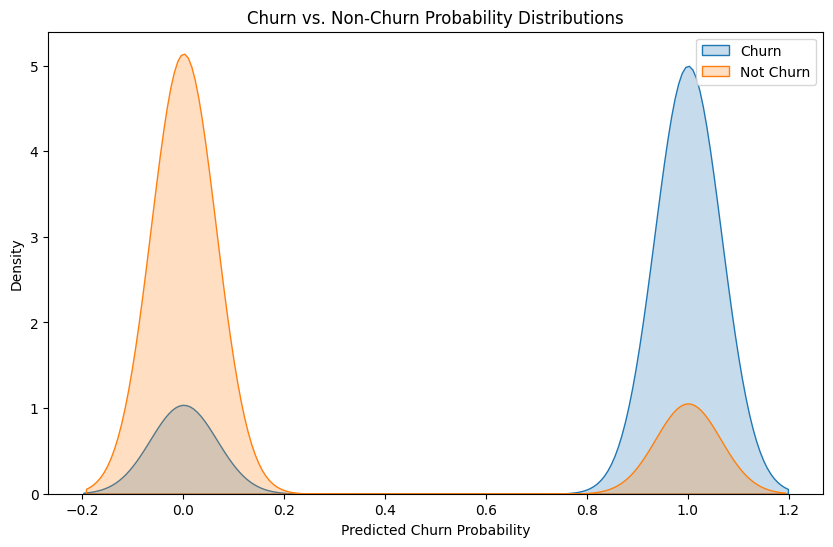

In [33]:
plt.figure(figsize=(10,6))
sns.kdeplot(y_pred1[y_test1 == 1], label="Churn", fill=True)
sns.kdeplot(y_pred1[y_test1 == 0], label="Not Churn", fill=True)
plt.xlabel("Predicted Churn Probability")
plt.ylabel("Density")
plt.title("Churn vs. Non-Churn Probability Distributions")
plt.legend()
plt.show()

# Question No : 3

In [34]:
df3=pd.read_csv("diabetes.csv")
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,NaN,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1


In [48]:
df3.dropna(inplace =True)

In [50]:
df3.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As there are no missing values so we will not perform any kind of method to remove or replace it

### visualization

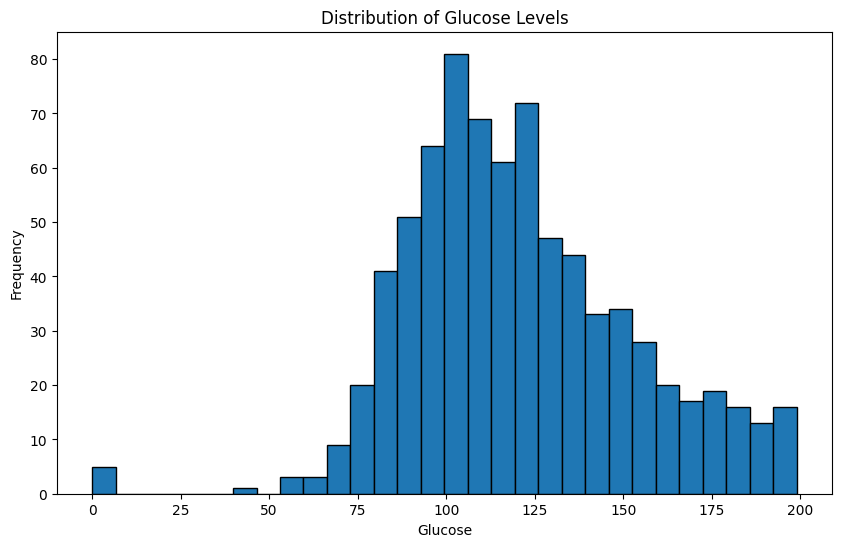

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(df3['Glucose'], bins=30, edgecolor='black')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


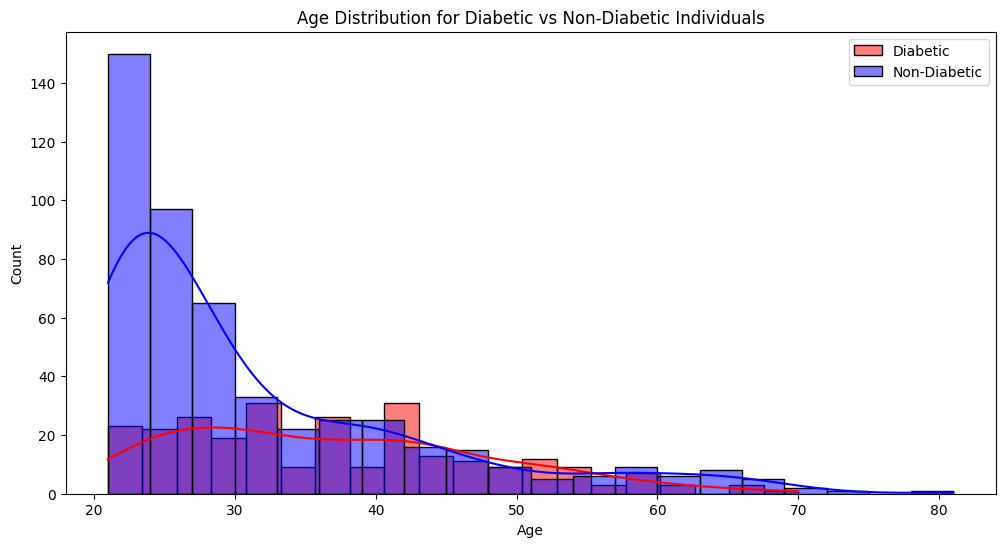

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(df3[df3['Outcome'] == 1]['Age'], kde=True, color='red', label='Diabetic', bins=20)
sns.histplot(df3[df3['Outcome'] == 0]['Age'], kde=True, color='blue', label='Non-Diabetic', bins=20)
plt.title('Age Distribution for Diabetic vs Non-Diabetic Individuals')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

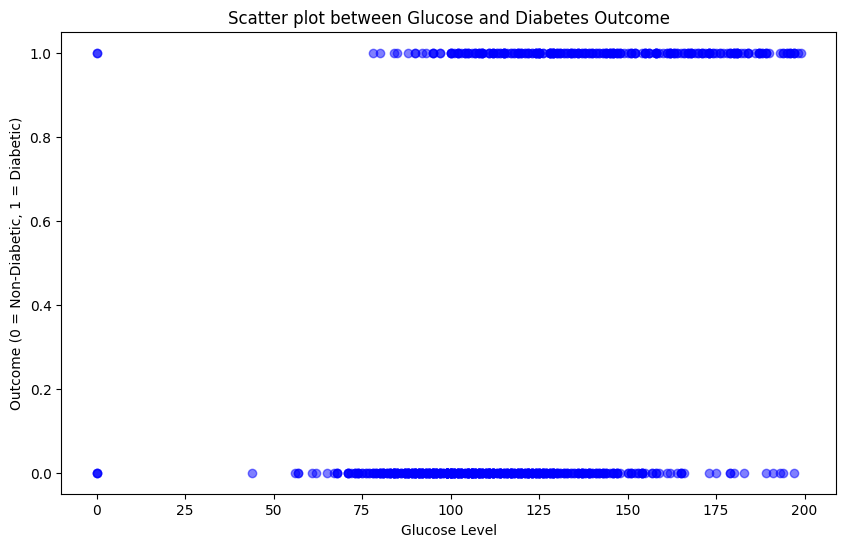

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(x=df3['Glucose'], y=df3['Outcome'], color='blue', alpha=0.5)
plt.title('Scatter plot between Glucose and Diabetes Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()

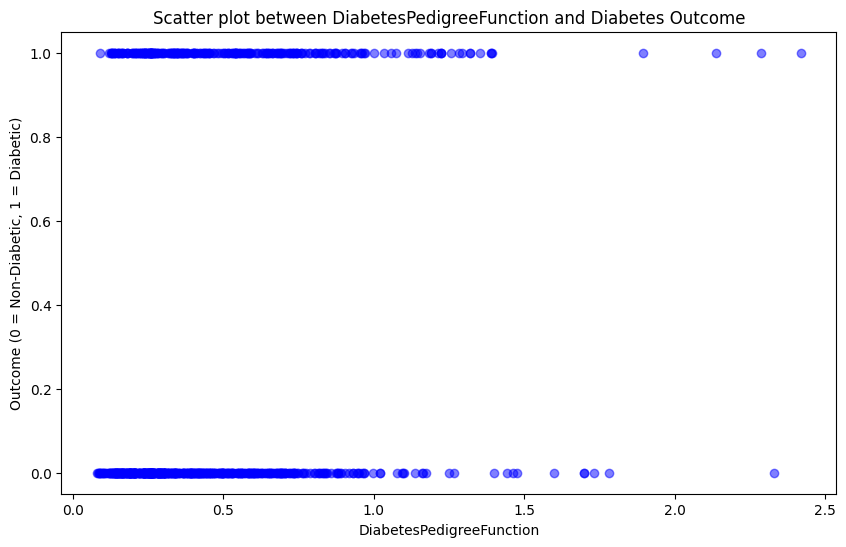

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(x=df3['DiabetesPedigreeFunction'], y=df3['Outcome'], color='blue', alpha=0.5)
plt.title('Scatter plot between DiabetesPedigreeFunction and Diabetes Outcome')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()

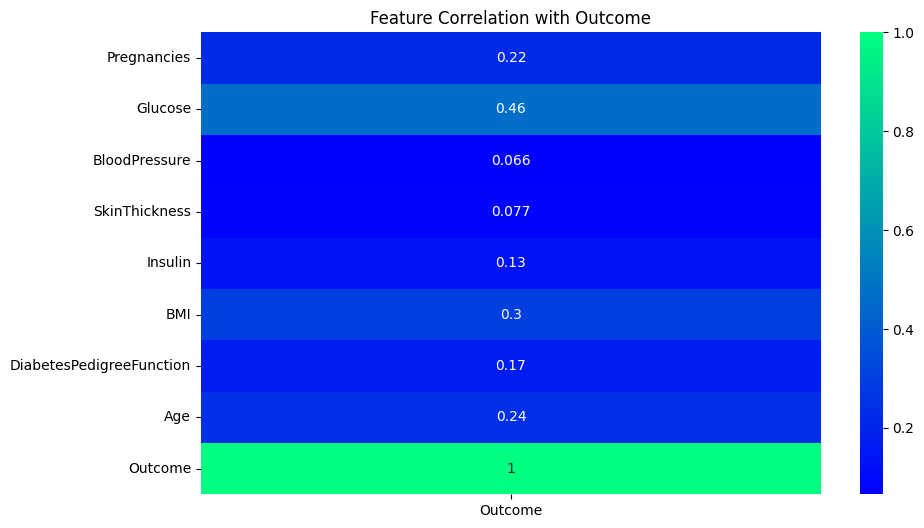

In [55]:
corr_matrix = df3.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['Outcome']], annot=True, cmap='winter')
plt.title("Feature Correlation with Outcome")
plt.show()

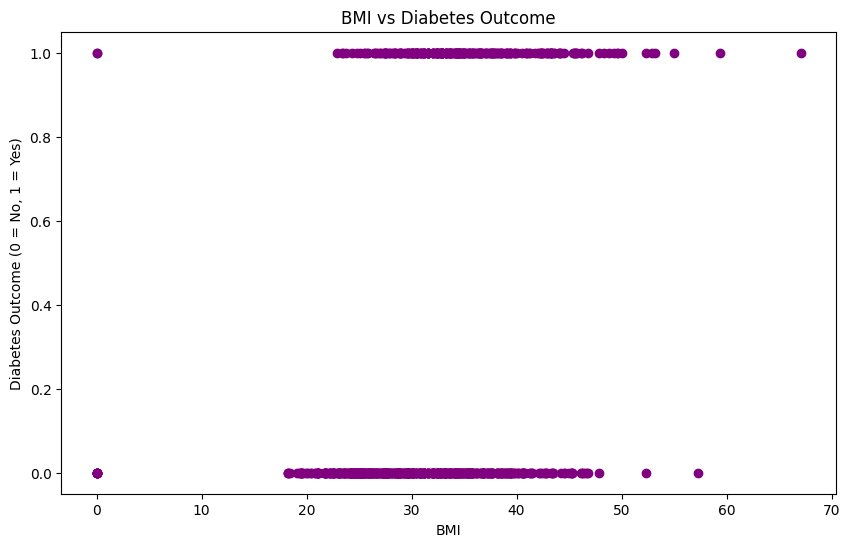

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(df3['BMI'], df3['Outcome'], color='purple')
plt.title('BMI vs Diabetes Outcome')
plt.xlabel('BMI')
plt.ylabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.show()

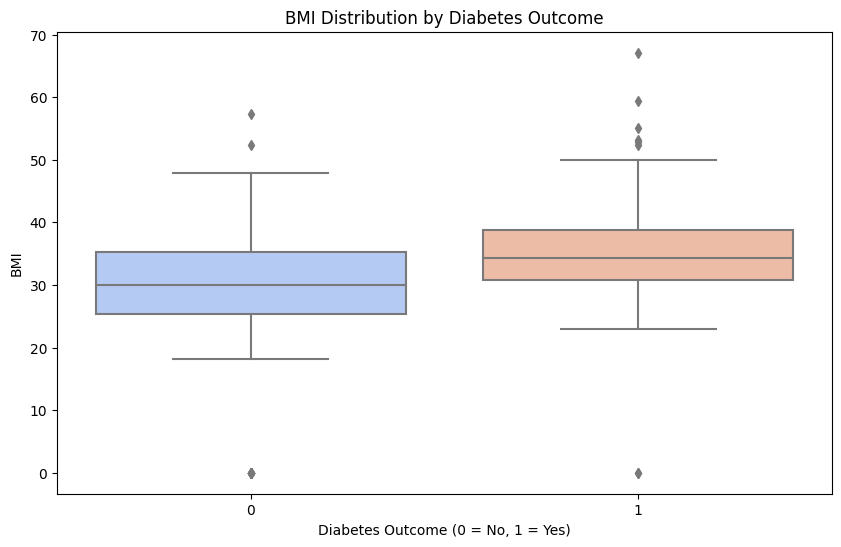

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='BMI', data=df3, palette='coolwarm')
plt.title('BMI Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

Traning and testing splitting

In [58]:
X3=df3.drop("Outcome",axis=1)
y3=df3['Outcome']
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y3,test_size=0.2,random_state=42)
# print shape of traning and testing
print(X_train3.shape,X_test3.shape,y_train3.shape,y_test3.shape)

(613, 8) (154, 8) (613,) (154,)


In [59]:
model3=LogisticRegression()
model3.fit(X_train3,y_train3)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred3=model3.predict(X_test3)
print("Accuracy : ",accuracy_score(y_test3,y_pred3))

Accuracy :  0.7987012987012987


In [63]:
cm = confusion_matrix(y_test3, y_pred3)
cm

array([[87, 10],
       [21, 36]], dtype=int64)